In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
year=2006

In [10]:
root_path = '/Users/Daniel/Library/CloudStorage/OneDrive-VestigiumMétodosMixtosAplicadosSAS/proyectos/DISES'
nis_path = os.path.join(root_path, f'SAE/STATA DHS/Stata NIS data/NIS_Village/NISAddRates_{year}.xlsx')
sel_col=["VillGis","Province", "District", "Commune", "Village", "XPHUM","YPHUM", "Year", "366-KM_Heal_cent", "373-TOT_UD5_die", "523-C_MORT_RATE", "512-ILLITERATE_POP", "513-ILLITERATE_RATE", "516-UNIMPROV_WAT","517-UNIMPROV_WAT_RATE","325-THAT_R_Elec","534-LQ_ROOF_ELEC_RATE","520-MOB_ASSETS","521-MOB_ASSETS_RATE", "330-Villa_R_Elec", "528-Elec_Rate","23-TOILET","532-Sanit_Rate", "531-AGRI_ASSETS_RATE", "530-AGRI_ASSETS"]
MPI_NIS = pd.read_excel(nis_path, usecols=sel_col)
MPI_NIS.head()

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,523-C_MORT_RATE,516-UNIMPROV_WAT,517-UNIMPROV_WAT_RATE,528-Elec_Rate,534-LQ_ROOF_ELEC_RATE,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate
0,1020101,Banteay Meanchey,Mongkol Borei,Banteay Neang,Ou Thum,287800.0,1494700.0,2006,2.0,0.0,...,0.0,139.0,100.000000,0.0,1.438849,42.0,2.792553,266.0,191.366906,10.071942
1,1020102,Banteay Meanchey,Mongkol Borei,Banteay Neang,Phnum,285900.0,1494700.0,2006,0.0,0.0,...,0.0,294.0,149.238579,0.0,0.000000,61.0,6.262834,404.0,205.076142,20.304569
2,1020103,Banteay Meanchey,Mongkol Borei,Banteay Neang,Banteay Neang,285900.0,1494300.0,2006,0.0,0.0,...,0.0,365.0,103.399433,0.0,0.000000,160.0,8.255934,569.0,161.189802,45.325779
3,1020104,Banteay Meanchey,Mongkol Borei,Banteay Neang,Kouk Pnov,284900.0,1493500.0,2006,0.0,0.0,...,0.0,207.0,127.777778,0.0,0.000000,21.0,2.372881,316.0,195.061728,19.135802
4,1020105,Banteay Meanchey,Mongkol Borei,Banteay Neang,Trang,285000.0,1494100.0,2006,5.0,0.0,...,0.0,265.0,172.077922,0.0,3.246753,66.0,8.741722,220.0,142.857143,25.974026


## Relevant variables for MPI construction

In [11]:
MPI_NIS.isnull().sum()

VillGis                     0
Province                    0
District                    0
Commune                     0
Village                     0
XPHUM                    1110
YPHUM                    1110
Year                        0
325-THAT_R_Elec           310
330-Villa_R_Elec          310
366-KM_Heal_cent          310
373-TOT_UD5_die           311
23-TOILET                 310
512-ILLITERATE_POP        310
513-ILLITERATE_RATE       311
523-C_MORT_RATE           313
516-UNIMPROV_WAT          311
517-UNIMPROV_WAT_RATE     312
528-Elec_Rate             312
534-LQ_ROOF_ELEC_RATE     312
520-MOB_ASSETS            310
521-MOB_ASSETS_RATE       311
530-AGRI_ASSETS           311
531-AGRI_ASSETS_RATE      312
532-Sanit_Rate            312
dtype: int64

## Creation of dummies for MPI construction

### Health

#### Distance to health center (analysis unit  - village)
<p> The recommended average distance to a health center is for 5 km distance to the nearest hospital and 3 km to the nearest CHP or Health Center (Ashiagbor et al., 2020a). The creation of a dummy for deprivation of the variable "366-KM_Heal_cent" in which 1 means deprivation (average distance center is higher than 5km).
    
  Source:https://www.sciencedirect.com/science/article/pii/S2468227620301915#:~:text=The%20World%20Health%20Organization%20(WHO)%20recommends%20that%20for%20optimal%20access,the%20measure%20investigated%20%5B24%5D. </p> 

In [12]:
MPI_NIS.loc[:,'535-Heal_cent_DUM'] = (MPI_NIS['366-KM_Heal_cent'] >= 5).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,516-UNIMPROV_WAT,517-UNIMPROV_WAT_RATE,528-Elec_Rate,534-LQ_ROOF_ELEC_RATE,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13886.000000,13885.000000,13885.000000,13885.000000,13887.000000,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,208.906020,113.262226,0.169877,0.491929,60.682682,inf,345.468097,190.919386,16.661512,0.335071
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,177.309534,26.888082,1.728739,3.287211,102.656426,NaN,261.755828,40.144872,26.064478,0.472032
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,107.000000,100.000000,0.000000,0.000000,20.000000,2.945410e+00,182.000000,173.770492,1.030928,0.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,165.000000,100.000000,0.000000,0.000000,36.000000,4.933898e+00,284.000000,197.927461,5.479452,0.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,255.000000,110.582011,0.000000,0.000000,64.000000,8.032805e+00,433.000000,210.344828,17.948718,1.000000


#### Child mortality (unit of analysis - village) 
<p> According to UNICEF the global child mortality rate is 3.8%, so this value will be considered as the threshold of deprivation, in which if the village has a value equal or greater to 3.8% will be considered as deprived and will take a value of 1.
    
Source: https://data.unicef.org/topic/child-survival/under-five-mortality/ </p> 

In [13]:
MPI_NIS.loc[:,'536-C_MORT_DUM'] = (MPI_NIS['523-C_MORT_RATE'] >= 3.8).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,517-UNIMPROV_WAT_RATE,528-Elec_Rate,534-LQ_ROOF_ELEC_RATE,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13885.000000,13885.000000,13885.000000,13887.000000,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,113.262226,0.169877,0.491929,60.682682,inf,345.468097,190.919386,16.661512,0.335071,0.025146
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,26.888082,1.728739,3.287211,102.656426,NaN,261.755828,40.144872,26.064478,0.472032,0.156574
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,100.000000,0.000000,0.000000,20.000000,2.945410e+00,182.000000,173.770492,1.030928,0.000000,0.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,100.000000,0.000000,0.000000,36.000000,4.933898e+00,284.000000,197.927461,5.479452,0.000000,0.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,110.582011,0.000000,0.000000,64.000000,8.032805e+00,433.000000,210.344828,17.948718,1.000000,0.000000


#### Nutrition
<p> To be predicted with DHS data...  
The village will be considered in deprivation if the predicted variable for nutrition from DHS data is over 10.57% (average between 7%, 6.2% (female and male prevalence of underweight in adults] , 22.3% and 5.6% [children stunted and wasted in  2022]).

Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC7615769/#:~:text=The%20global%20age%2Dstandardised%20prevalence,6%C2%B79)%20in%20men
https://openknowledge.fao.org/server/api/core/bitstreams/f1ee0c49-04e7-43df-9b83-6820f4f37ca9/content/state-food-security-and-nutrition-2023/global-nutrition-targets-trends.html#:~:text=%E2%9E%94%20Worldwide%20in%202022%20among,(5.6%20percent)%20were%20overweight.</p>


### Education

#### Illiteracy rate (15 - 49years) (unit of analysis - village)
<p> The village will be considered deprived if the illiteracy rate is higher than 11.5% (the average among the adult and youth illiteracy rate (91% and 86% of literacy rate for youth and adult population is 91% and 86% in 2016). However, it exists the option of dividing by adult and youth to compare with each illiteracy rate of each age group) for establishing the threshold.   

Source: https://uis.unesco.org/sites/default/files/documents/fs45-literacy-rates-continue-rise-generation-to-next-en-2017_0.pdf </p>

In [14]:
MPI_NIS.loc[:,'537-ILLIT_DUM'] = (MPI_NIS['513-ILLITERATE_RATE'] >= 11.5).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,528-Elec_Rate,534-LQ_ROOF_ELEC_RATE,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13885.000000,13885.000000,13887.000000,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,0.169877,0.491929,60.682682,inf,345.468097,190.919386,16.661512,0.335071,0.025146,0.202015
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,1.728739,3.287211,102.656426,NaN,261.755828,40.144872,26.064478,0.472032,0.156574,0.401517
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,20.000000,2.945410e+00,182.000000,173.770492,1.030928,0.000000,0.000000,0.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,36.000000,4.933898e+00,284.000000,197.927461,5.479452,0.000000,0.000000,0.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,64.000000,8.032805e+00,433.000000,210.344828,17.948718,1.000000,0.000000,0.000000


#### School attendance
<p> To be predicted with DHS data...
If the school attendance rate, predicted with DHS data, is under 84% the village will be considered in deprivation. This threshold is established due to UNESCO’s number of global percentage of children and youth who aren’t attending school (16%). 

Source: https://www.unesco.org/en/articles/250-million-children-out-school-what-you-need-know-about-unescos-latest-education-data#:~:text=Globally%2C%2016%20%25%20of%20children%20and,are%20girls%20and%20young%20women.  </p>

### Living standards
#### Source of water (unit of analysis - village)
<p> The threshold  for this variable is 71% of population using safely manage drinking water or improved sources (average of 69% to 73% of 2015 and 2022 mentioned by SDG 6). 

Source: https://sdgs.un.org/goals/goal6#progress_and_info </p>

In [15]:
MPI_NIS.loc[:,'538-UNIMPROV_WAT_DUM'] = (MPI_NIS["517-UNIMPROV_WAT_RATE"] >= 29).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,534-LQ_ROOF_ELEC_RATE,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13885.000000,13887.000000,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,0.491929,60.682682,inf,345.468097,190.919386,16.661512,0.335071,0.025146,0.202015,0.978024
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,3.287211,102.656426,NaN,261.755828,40.144872,26.064478,0.472032,0.156574,0.401517,0.146612
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,0.000000,20.000000,2.945410e+00,182.000000,173.770492,1.030928,0.000000,0.000000,0.000000,1.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,0.000000,36.000000,4.933898e+00,284.000000,197.927461,5.479452,0.000000,0.000000,0.000000,1.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,0.000000,64.000000,8.032805e+00,433.000000,210.344828,17.948718,1.000000,0.000000,0.000000,1.000000


#### Sanitation (unit of analysis - village)
<p> The threshold  for this variable is 53% of population using safely manage sanitation (average of 49% to 57% of 2015 and 2022 mentioned by SDG 6). So the deprivation criteria will be if the sanitation rate per village is equal or under 53%.  
    
Source: https://sdgs.un.org/goals/goal6#progress_and_info </p>

In [16]:
MPI_NIS.loc[:,'539-SANIT_DUM'] = (MPI_NIS['532-Sanit_Rate'] <= 53).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,520-MOB_ASSETS,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13887.000000,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,60.682682,inf,345.468097,190.919386,16.661512,0.335071,0.025146,0.202015,0.978024,0.873776
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,102.656426,NaN,261.755828,40.144872,26.064478,0.472032,0.156574,0.401517,0.146612,0.332113
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,20.000000,2.945410e+00,182.000000,173.770492,1.030928,0.000000,0.000000,0.000000,1.000000,1.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,36.000000,4.933898e+00,284.000000,197.927461,5.479452,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,64.000000,8.032805e+00,433.000000,210.344828,17.948718,1.000000,0.000000,0.000000,1.000000,1.000000


#### Housing materials [roof] and electricity (unit of analysis - village)
<p>   Only about 66% of housing units are built with durable material for roof, wall, or floor and the global electricity access is 91% so the threshold could be a the average of 66% and 91% (78.5%). 
    
Source: https://sdgs.un.org/goals/goal7#progress_and_info    and  https://documents1.worldbank.org/curated/en/370141635794493951/pdf/Introducing-the-Adequate-Housing-Index-AHI-A-New-Approach-to-Estimate-the-Adequate-Housing-Deficit-within-and-across-Emerging-Economies.pdf (p. 19) </p>

In [17]:
MPI_NIS.loc[:,'540-HOUSE_ELEC_DUM'] = (MPI_NIS["534-LQ_ROOF_ELEC_RATE"] >= 34).astype(int)
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,521-MOB_ASSETS_RATE,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,1.388600e+04,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,inf,345.468097,190.919386,16.661512,0.335071,0.025146,0.202015,0.978024,0.873776,0.002536
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,NaN,261.755828,40.144872,26.064478,0.472032,0.156574,0.401517,0.146612,0.332113,0.050294
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,2.945410e+00,182.000000,173.770492,1.030928,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,4.933898e+00,284.000000,197.927461,5.479452,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,8.032805e+00,433.000000,210.344828,17.948718,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000


#### Assets (unit of analysis - village)
<p>  As the assets considered for this variable are mobility assets (motorcycles and motor tri-cycles), the assets available at NIS data, then the threshold is related to the average number of motorcycles per capita registered by the Ministry of Public Works and Transport of Cambodia, which is 36.8% (6,416,230 motorcycles registered in 2023 out of its population, 17,423,880) 
    
Source: https://kiripost.com/stories/more-than-75m-vehicles-officially-certified and https://data.worldbank.org </p>

In [18]:
MPI_NIS.loc[:,'541-MOB_ASSETS_DUM'] = (MPI_NIS["521-MOB_ASSETS_RATE"] <= 36.8).astype(int)
MPI_NIS.describe(include="all")

#Review agricultural assets "530-AGRI_ASSETS" & "531-AGRI_ASSETS_RATE"

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,530-AGRI_ASSETS,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13886.000000,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,345.468097,190.919386,16.661512,0.335071,0.025146,0.202015,0.978024,0.873776,0.002536,0.977108
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,261.755828,40.144872,26.064478,0.472032,0.156574,0.401517,0.146612,0.332113,0.050294,0.149565
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,182.000000,173.770492,1.030928,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,284.000000,197.927461,5.479452,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,433.000000,210.344828,17.948718,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000


#### Cooking fuel
<p> To be predicted with DHS data...  
    Using the predicting data for the indicator of clean cooking fuels, the village will be considered deprived if the cooking fuel rate is below 74%, because, according to SDG7 data, around that percentage of the world used clean fuels for cooking in 2022. 

Source: https://sdgs.un.org/goals/goal7#progress_and_info </p>

In [20]:
#Save the dataset for predictions
file_path = os.path.join('data/mpi_underlying_nis', f'nis-und-{year}.xlsx')
MPI_NIS.to_excel(file_path)

### MPI

In [28]:
MPI_NIS.loc[:,"MPI"] = MPI_NIS['535-Heal_cent_DUM']*1/9 + MPI_NIS['536-C_MORT_DUM']*1/9 + MPI_NIS['537-ILLIT_DUM'] * 1/6 + MPI_NIS['538-UNIMPROV_WAT_DUM']*1/15 + MPI_NIS['539-SANIT_DUM'] * 1/15 + MPI_NIS['540-HOUSE_ELEC_DUM']*1/15 + MPI_NIS['541-MOB_ASSETS_DUM'] *1/15
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM,MPI
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,13885.000000,13885.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,190.919386,16.661512,0.335071,0.025146,0.202015,0.978024,0.873776,0.002536,0.977108,0.262456
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,40.144872,26.064478,0.472032,0.156574,0.401517,0.146612,0.332113,0.050294,0.149565,0.109119
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,173.770492,1.030928,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.200000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,197.927461,5.479452,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.200000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,210.344828,17.948718,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.311111


In [29]:
print(MPI_NIS["MPI"].unique())

[0.2        0.31111111 0.13333333 0.47777778 0.36666667 0.24444444
 0.26666667 0.         0.41111111 0.3        0.42222222 0.37777778
 0.58888889 0.35555556 0.43333333 0.16666667 0.17777778 0.06666667
 0.54444444 0.52222222]


<Axes: >

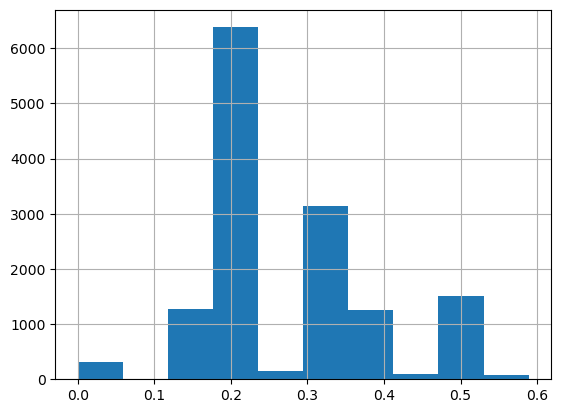

In [92]:
MPI_NIS["MPI"].hist(bins=10)

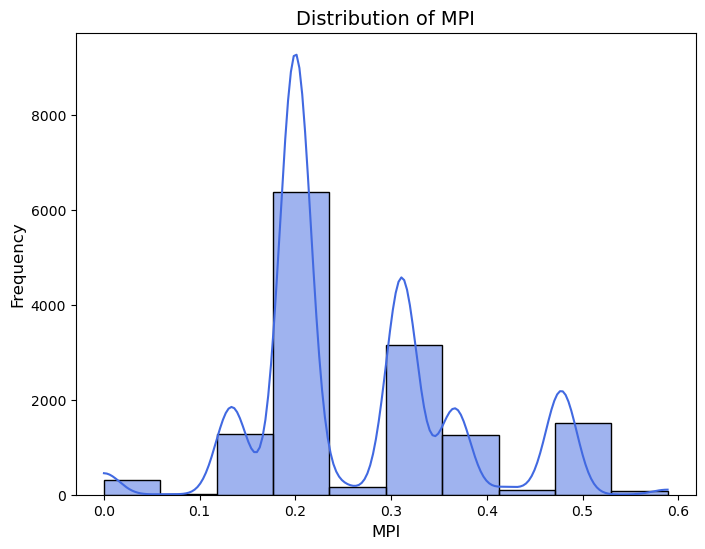

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# Create histogram with Seaborn
sns.histplot(MPI_NIS["MPI"], bins=10, kde=True, color="royalblue")

# Customize labels and title
plt.xlabel("MPI", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of MPI", fontsize=14)

# Show the plot
plt.show()

### Poverty status for each village

In [35]:
MPI_NIS.loc[:,"539-Poverty_Status"] = MPI_NIS["MPI"] > (1/3)
MPI_NIS.loc[:,"539-Poverty_Status"] = MPI_NIS["539-Poverty_Status"].replace({True: "Multidimensionally poor", False: "Multidimensionally not poor"})
MPI_NIS.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_27332\431489688.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Multidimensionally not poor' 'Multidimensionally not poor'
 'Multidimensionally not poor' ... 'Multidimensionally poor'
 'Multidimensionally poor' 'Multidimensionally poor']' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  MPI_NIS.loc[:,"539-Poverty_Status"] = MPI_NIS["539-Poverty_Status"].replace({True: "Multidimensionally poor", False: "Multidimensionally not poor"})


,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM,MPI,539-Poverty_Status
0,1020101,Banteay Meanchey,Mongkol Borei,Banteay Neang,Ou Thum,287800.0,1494700.0,2006,2.0,0.0,...,10.071942,0,0,0,1,1,0,1,0.2,Multidimensionally not poor
1,1020102,Banteay Meanchey,Mongkol Borei,Banteay Neang,Phnum,285900.0,1494700.0,2006,0.0,0.0,...,20.304569,0,0,0,1,1,0,1,0.2,Multidimensionally not poor
2,1020103,Banteay Meanchey,Mongkol Borei,Banteay Neang,Banteay Neang,285900.0,1494300.0,2006,0.0,0.0,...,45.325779,0,0,0,1,1,0,1,0.2,Multidimensionally not poor
3,1020104,Banteay Meanchey,Mongkol Borei,Banteay Neang,Kouk Pnov,284900.0,1493500.0,2006,0.0,0.0,...,19.135802,0,0,0,1,1,0,1,0.2,Multidimensionally not poor
4,1020105,Banteay Meanchey,Mongkol Borei,Banteay Neang,Trang,285000.0,1494100.0,2006,5.0,0.0,...,25.974026,0,0,0,1,1,0,1,0.2,Multidimensionally not poor


In [36]:
MPI_NIS.groupby("539-Poverty_Status")["VillGis"].nunique()

539-Poverty_Status
Multidimensionally not poor    11266
Multidimensionally poor         2931
Name: VillGis, dtype: int64

In [37]:
villgis_counts = MPI_NIS.groupby("539-Poverty_Status")["VillGis"].nunique()
total_vill = villgis_counts.sum()

percent_poor = (villgis_counts["Multidimensionally poor"] / total_vill) * 100
print(f"Multidimensionally poor village: {percent_poor:.2f}%")

Multidimensionally poor village: 20.65%


In [38]:
MPI_NIS.to_excel(rf"C:\Users\laura\Vestigium Métodos Mixtos Aplicados SAS\Daniel Wiesner - DISES\SAE\STATA DHS\Stata NIS data\MPI_NIS\MPI_NIS_{year}.xlsx", index=False)

In [44]:
MPI_NIS.head()

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,531-AGRI_ASSETS_RATE,532-Sanit_Rate,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM,MPI
0,1020101,Banteay Meanchey,Mongkol Borei,Banteay Neang,Ou Thum,287800.0,1494700.0,2006,2.0,0.0,...,191.366906,10.071942,0,0,0,1,1,0,1,0.2
1,1020102,Banteay Meanchey,Mongkol Borei,Banteay Neang,Phnum,285900.0,1494700.0,2006,0.0,0.0,...,205.076142,20.304569,0,0,0,1,1,0,1,0.2
2,1020103,Banteay Meanchey,Mongkol Borei,Banteay Neang,Banteay Neang,285900.0,1494300.0,2006,0.0,0.0,...,161.189802,45.325779,0,0,0,1,1,0,1,0.2
3,1020104,Banteay Meanchey,Mongkol Borei,Banteay Neang,Kouk Pnov,284900.0,1493500.0,2006,0.0,0.0,...,195.061728,19.135802,0,0,0,1,1,0,1,0.2
4,1020105,Banteay Meanchey,Mongkol Borei,Banteay Neang,Trang,285000.0,1494100.0,2006,5.0,0.0,...,142.857143,25.974026,0,0,0,1,1,0,1,0.2


In [107]:
# List for relevant columns
cols = [
    "366-KM_Heal_cent", "523-C_MORT_RATE", "513-ILLITERATE_RATE", 
    "517-UNIMPROV_WAT_RATE", "534-LQ_ROOF_ELEC_RATE", "521-MOB_ASSETS_RATE", 
    "532-Sanit_Rate"
]

# Thresholds
thresholds = {
    "366-KM_Heal_cent": (5, ">="),    
    "523-C_MORT_RATE": (3.8, ">="),    
    "513-ILLITERATE_RATE": (11.5, ">="),
    "517-UNIMPROV_WAT_RATE": (29, ">="),  
    "534-LQ_ROOF_ELEC_RATE": (34, ">="),  
    "521-MOB_ASSETS_RATE": (36.8, "<="),  
    "532-Sanit_Rate": (53, "<="),  
}

# Weights per variable 
weights = {
    "366-KM_Heal_cent": 1/9, "523-C_MORT_RATE": 1/9, "513-ILLITERATE_RATE": 1/6, 
    "517-UNIMPROV_WAT_RATE": 1/15, "534-LQ_ROOF_ELEC_RATE": 1/15, 
    "521-MOB_ASSETS_RATE": 1/15, "532-Sanit_Rate": 1/15
}

# Mean per columns
means = MPI_NIS[cols].dropna().mean()

# Deprivation dummy for each threshold
dummies = {}
for col in cols:
    threshold, operator = thresholds[col]
    
    if operator == ">":
        dummies[col] = int(means[col] > threshold)
    elif operator == ">=":
        dummies[col] = int(means[col] >= threshold)
    elif operator == "<":
        dummies[col] = int(means[col] < threshold)
    elif operator == "<=":
        dummies[col] = int(means[col] <= threshold)

# Multiplying each weight for calculating each MPI
MPI_global = sum(dummies[col] * weights[col] for col in cols)

# Print results
print("Column means:")
print(means)

print("\nDeprivation dummies:")
print(dummies)

print(f"\nGlobal MPI (4th methodogy): {MPI_global:.4f}")

MPImean = MPI_NIS["MPI"].mean()

print(f"\nGlobal MPI (1,2 and 3rd methodogy): {MPImean:.4f}")

dif=0.4222-0.31598811955577466

print("\n Score diference between methodologies:")
print(f"{dif:.4f}")


Column means:
366-KM_Heal_cent          69.219486
523-C_MORT_RATE                 inf
513-ILLITERATE_RATE        7.136654
517-UNIMPROV_WAT_RATE    113.264137
534-LQ_ROOF_ELEC_RATE      0.492000
521-MOB_ASSETS_RATE        6.213544
532-Sanit_Rate            16.663344
dtype: float64

Deprivation dummies:
{'366-KM_Heal_cent': 1, '523-C_MORT_RATE': 1, '513-ILLITERATE_RATE': 0, '517-UNIMPROV_WAT_RATE': 1, '534-LQ_ROOF_ELEC_RATE': 0, '521-MOB_ASSETS_RATE': 1, '532-Sanit_Rate': 1}

Global MPI (4th methodogy): 0.4222

Global MPI (1,2 and 3rd methodogy): 0.3160

 Score diference between methodologies:
0.1062


## MPI without DHS estimates

In [40]:
MPI_NIS.loc[:,"MPI_nodhs"] = MPI_NIS['535-Heal_cent_DUM']*1/6 + MPI_NIS['536-C_MORT_DUM']*1/6 + MPI_NIS['537-ILLIT_DUM'] * 1/3 + MPI_NIS['538-UNIMPROV_WAT_DUM']*1/12 + MPI_NIS['539-SANIT_DUM'] * 1/12 + MPI_NIS['540-HOUSE_ELEC_DUM']*1/12 + MPI_NIS['541-MOB_ASSETS_DUM'] *1/12
MPI_NIS.describe(include="all")

,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,535-Heal_cent_DUM,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM,MPI,539-Poverty_Status,MPI_nodhs
count,1.419700e+04,14197,14197,14197,14197,13087.000000,1.308700e+04,14197.0,13887.000000,13887.000000,...,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197,14197.000000
unique,NaN,24,193,1433,9008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Kampong Cham,Samraong Tong,Samraong,Thmei,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multidimensionally not poor,NaN
freq,NaN,1769,295,103,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11266,NaN
mean,1.020895e+07,NaN,NaN,NaN,NaN,472119.317261,1.334177e+06,2006.0,1.485922,0.415641,...,0.335071,0.025146,0.202015,0.978024,0.873776,0.002536,0.977108,0.262456,NaN,0.363328
std,6.693989e+06,NaN,NaN,NaN,NaN,100294.523951,1.050673e+05,0.0,16.462631,4.402896,...,0.472032,0.156574,0.401517,0.146612,0.332113,0.050294,0.149565,0.109119,NaN,0.186875
min,1.020101e+06,NaN,NaN,NaN,NaN,213079.000000,1.152671e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,4.060604e+06,NaN,NaN,NaN,NaN,427327.000000,1.252136e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.200000,NaN,0.250000
50%,8.090106e+06,NaN,NaN,NaN,NaN,476316.000000,1.306287e+06,2006.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.200000,NaN,0.250000
75%,1.603010e+07,NaN,NaN,NaN,NaN,536482.000000,1.416946e+06,2006.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.311111,NaN,0.416667


In [41]:
print(MPI_NIS["MPI_nodhs"].unique())

[0.25       0.41666667 0.16666667 0.75       0.58333333 0.33333333
 0.         0.66666667 0.5        0.91666667 0.66666667 0.08333333
 0.83333333 0.83333333]


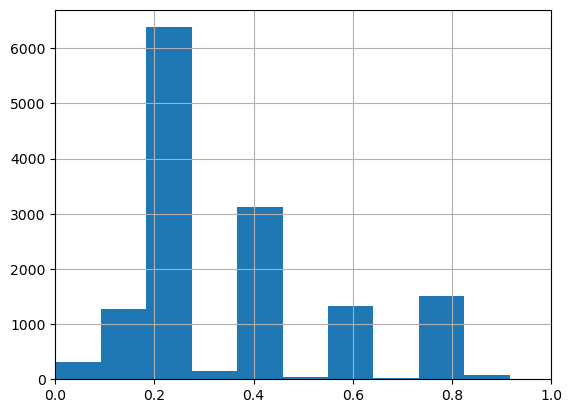

In [42]:
MPI_NIS["MPI_nodhs"].hist(bins=10)
plt.xlim(0, 1)
plt.show()

### Poverty status for each village

In [44]:
MPI_NIS.loc[:,"540-Poverty_Status_nodhs"] = MPI_NIS["MPI_nodhs"] > (1/3)
MPI_NIS.loc[:,"540-Poverty_Status_nodhs"] = MPI_NIS["540-Poverty_Status_nodhs"].replace({True: "Multidimensionally poor", False: "Multidimensionally not poor"})
MPI_NIS.head()

C:\Users\laura\AppData\Local\Temp\ipykernel_27332\1857783506.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Multidimensionally not poor' 'Multidimensionally not poor'
 'Multidimensionally not poor' ... 'Multidimensionally poor'
 'Multidimensionally poor' 'Multidimensionally poor']' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  MPI_NIS.loc[:,"540-Poverty_Status_nodhs"] = MPI_NIS["540-Poverty_Status_nodhs"].replace({True: "Multidimensionally poor", False: "Multidimensionally not poor"})


,VillGis,Province,District,Commune,Village,XPHUM,YPHUM,Year,325-THAT_R_Elec,330-Villa_R_Elec,...,536-C_MORT_DUM,537-ILLIT_DUM,538-UNIMPROV_WAT_DUM,539-SANIT_DUM,540-HOUSE_ELEC_DUM,541-MOB_ASSETS_DUM,MPI,539-Poverty_Status,MPI_nodhs,540-Poverty_Status_nodhs
0,1020101,Banteay Meanchey,Mongkol Borei,Banteay Neang,Ou Thum,287800.0,1494700.0,2006,2.0,0.0,...,0,0,1,1,0,1,0.2,Multidimensionally not poor,0.25,Multidimensionally not poor
1,1020102,Banteay Meanchey,Mongkol Borei,Banteay Neang,Phnum,285900.0,1494700.0,2006,0.0,0.0,...,0,0,1,1,0,1,0.2,Multidimensionally not poor,0.25,Multidimensionally not poor
2,1020103,Banteay Meanchey,Mongkol Borei,Banteay Neang,Banteay Neang,285900.0,1494300.0,2006,0.0,0.0,...,0,0,1,1,0,1,0.2,Multidimensionally not poor,0.25,Multidimensionally not poor
3,1020104,Banteay Meanchey,Mongkol Borei,Banteay Neang,Kouk Pnov,284900.0,1493500.0,2006,0.0,0.0,...,0,0,1,1,0,1,0.2,Multidimensionally not poor,0.25,Multidimensionally not poor
4,1020105,Banteay Meanchey,Mongkol Borei,Banteay Neang,Trang,285000.0,1494100.0,2006,5.0,0.0,...,0,0,1,1,0,1,0.2,Multidimensionally not poor,0.25,Multidimensionally not poor


In [45]:
MPI_NIS.groupby("540-Poverty_Status_nodhs")["VillGis"].nunique()

540-Poverty_Status_nodhs
Multidimensionally not poor    8119
Multidimensionally poor        6078
Name: VillGis, dtype: int64

In [46]:
villgis_counts = MPI_NIS.groupby("540-Poverty_Status_nodhs")["VillGis"].nunique()
total_vill = villgis_counts.sum()

percent_poor = (villgis_counts["Multidimensionally poor"] / total_vill) * 100
print(f"Multidimensionally poor village: {percent_poor:.2f}%")

Multidimensionally poor village: 42.81%


## NIS NA diagram

In [48]:
import functions

In [49]:
selected_columns = ["VillGis", "Province", "Village", "XPHUM", "YPHUM", "366-KM_Heal_cent", "523-C_MORT_RATE","513-ILLITERATE_RATE","517-UNIMPROV_WAT_RATE", "532-Sanit_Rate", "534-LQ_ROOF_ELEC_RATE", "521-MOB_ASSETS_RATE", "531-AGRI_ASSETS_RATE"]
MPI_NIS_selected = MPI_NIS[selected_columns]

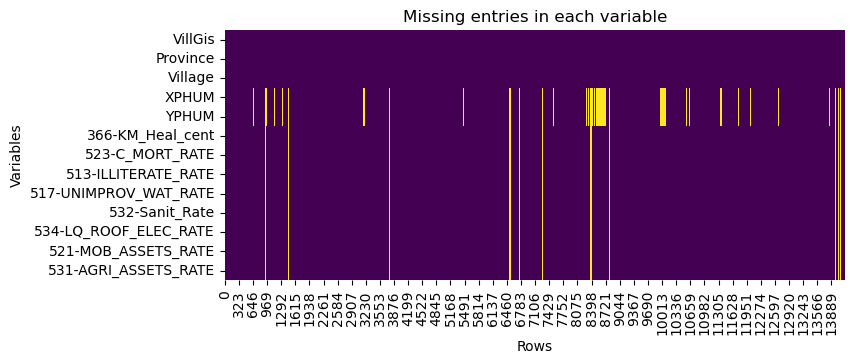

In [50]:
import matplotlib.pyplot as plt
# Generate the plot
functions.plot_missing_values_vertical(MPI_NIS_selected)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()  # Ensures everything fits within the figure

# Save the figure with enough space for the labels
picture_path = r"C:\Users\laura\Downloads\missing_values_plot.png"
plt.savefig(picture_path, dpi=300, bbox_inches='tight')

# Close the figure to free memory
plt.close()

## DHS MPI

In [52]:
mpi_dhs05=pd.read_csv(r"C:\Users\laura\Downloads\HH_MPI_DHS\mpi_dhs05.csv", delimiter=";")
mpi_dhs05.head()

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,d_nutr_01,d_satt_01,d_educ_01,d_elct_01,d_wtr_01,d_sani_01,d_hsg_01,d_ckfl_01,d_asst_01,mpi
0,10001,1000101,1,245,selected,0.414342,urban,Pursat,Pursat,60+,...,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0,0.166667
1,10001,1000102,1,245,selected,0.414342,urban,Pursat,Pursat,18-59,...,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0,0.166667
2,10001,1000103,1,245,selected,0.414342,urban,Pursat,Pursat,18-59,...,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0,0.166667
3,10001,1000104,1,245,selected,0.414342,urban,Pursat,Pursat,oct-17,...,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0,0.166667
4,10001,1000105,1,245,selected,0.414342,urban,Pursat,Pursat,oct-17,...,0.0,0.0,0.0,1.0,1.0,0,0,1.0,0,0.166667


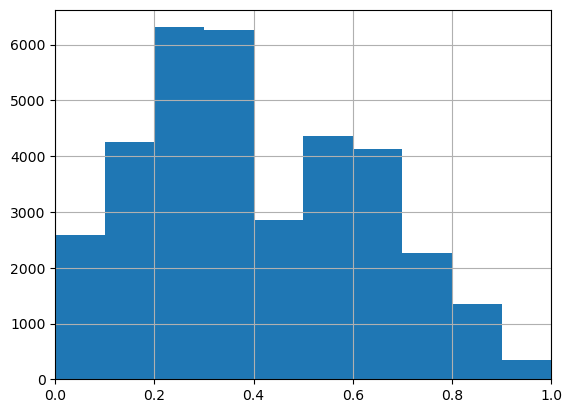

In [53]:
mpi_dhs05["mpi"].hist(bins=10)
plt.xlim(0, 1)
plt.show()

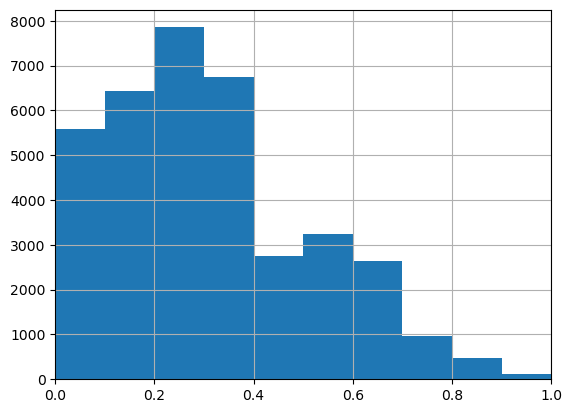

In [54]:
mpi_dhs10=pd.read_csv(r"C:\Users\laura\Downloads\HH_MPI_DHS\mpi_dhs10.csv", delimiter=";")
mpi_dhs10["mpi"].hist(bins=10)
plt.xlim(0, 1)
plt.show()

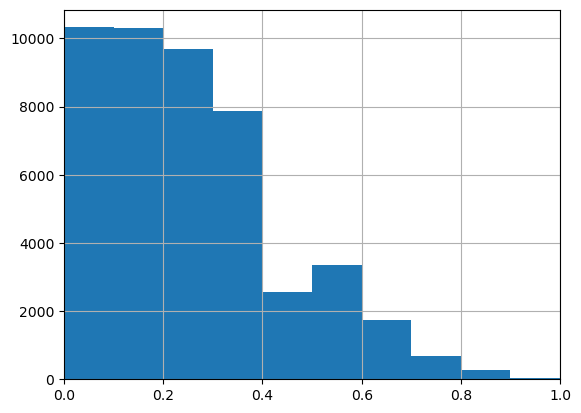

In [55]:
mpi_dhs14=pd.read_csv(r"C:\Users\laura\Downloads\HH_MPI_DHS\mpi_dhs14.csv", delimiter=",")
mpi_dhs14["mpi"].hist(bins=10)
plt.xlim(0, 1)
plt.show()

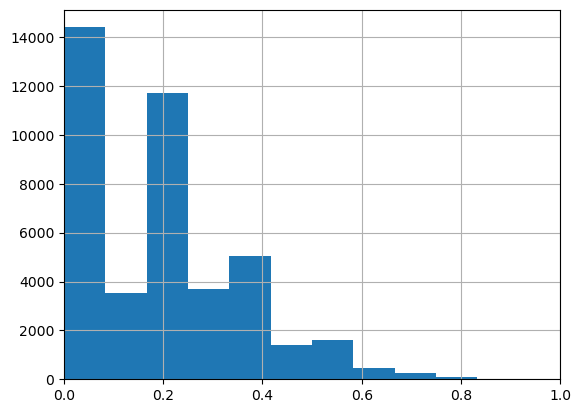

In [56]:
mpi_dhs21_22=pd.read_csv(r"C:\Users\laura\Downloads\HH_MPI_DHS\mpi_dhs21-22.csv", delimiter=",")
mpi_dhs21_22["mpi"].hist(bins=10)
plt.xlim(0, 1)
plt.show()